### Student Information
Name: 溫欣哲

Student ID: 107065519

GitHub ID: #34363280

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Part 1: Take Home exercises

Set necessary data and libraries 

In [27]:
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###  >>> Exercise 1 (take home): 

In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [28]:
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [29]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

###  >>> Exercise 2 & 3(take home): 

Experiment with other querying techniques using pandas dataframes.

In [30]:
X.loc[lambda f: f.category_name == 'sci.med'].iloc[::10, :][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


###  >>> Exercise 4(take home): 

Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
$Hint$ : axis parameter. Check the documentation for more information.

In [31]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

###  >>> Exercise 5(take home): 

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
$Hint$ : why .isnull() didn't work?

In [32]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [33]:
#Answer for Exercise 5
# It's because for C,D,F, the types for them are strings, not None(Nan). So by observing the 

###  >>> Exercise 6(take home): 

Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [34]:
X_sample = X.sample(n=1000) #random state

In [35]:
# Answer here
# The records are randomly chosen from the original datasets(1000 records), and the index are arranged in the order that are
# randomly selected

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

###  >>> Exercise 7(take home): 

Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sci.med                   274
comp.graphics             274
soc.religion.christian    242
alt.atheism               210
Name: category_name, dtype: int64


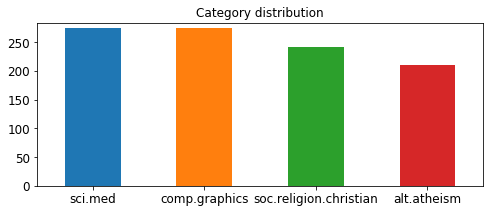

In [37]:
upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

###  >>> Exercise 8(take home): 

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

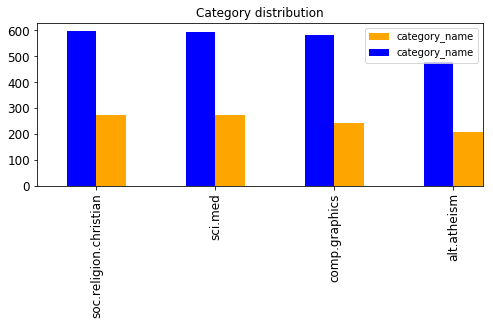

In [38]:
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           width = 0.25, color = 'orange',legend = True,
                                           rot = 0, fontsize = 12, figsize = (8,3), position = 0)
X.category_name.value_counts().plot(kind = 'bar', legend = True,
                                           width = 0.25, color = 'blue', position = 1)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

###  >>> Exercise 9(take home): 

Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [40]:
# Answer here
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

###  >>> Exercise 10(take home): 

We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [41]:
for i in range (0,100):
    if X_counts[4].toarray()[0][i] == 1 and i != 0:
        print(count_vect.get_feature_names()[i])

01


###  >>> Exercise 11(take home): 

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [42]:
X_sample = X.sample(n = 100)
sample_count_vect = CountVectorizer()
X_sample_counts = sample_count_vect.fit_transform(X_sample.text)

In [43]:
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)[0:20]]
plot_z = X_sample_counts[0:20, 0:20].toarray()

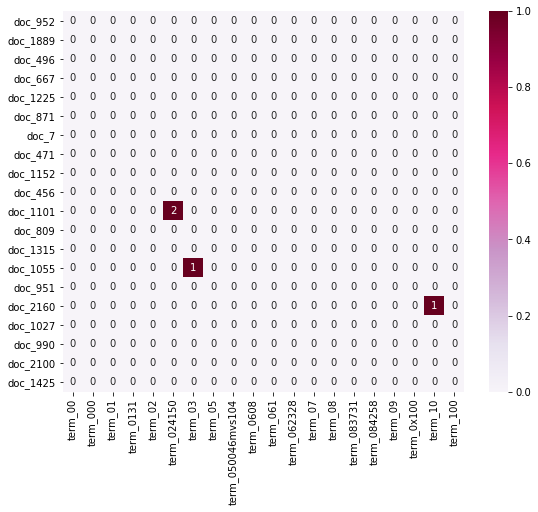

In [44]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

###  >>> Exercise 12(take home): 

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

In [45]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import random

95


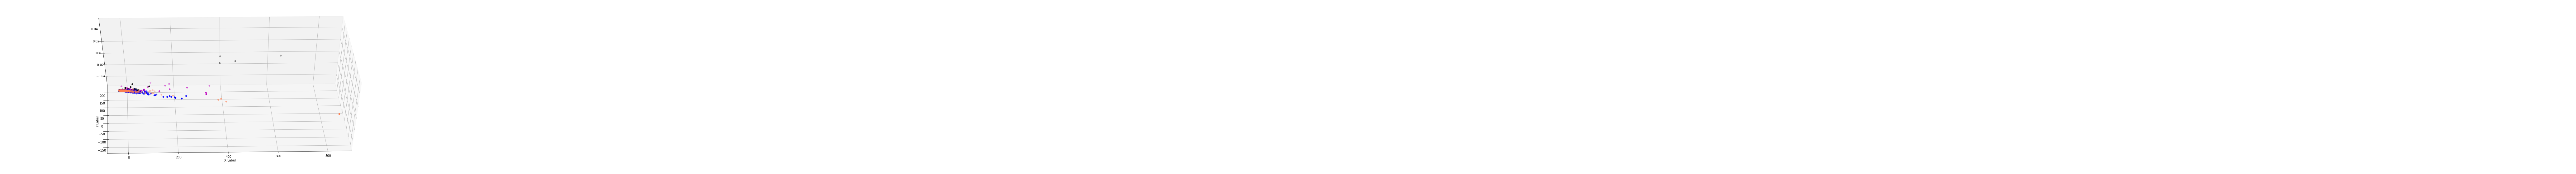

In [46]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.gca(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')


ax.view_init(45, random.randint(0,360))
print(random.randint(0,360))
plt.show()

194


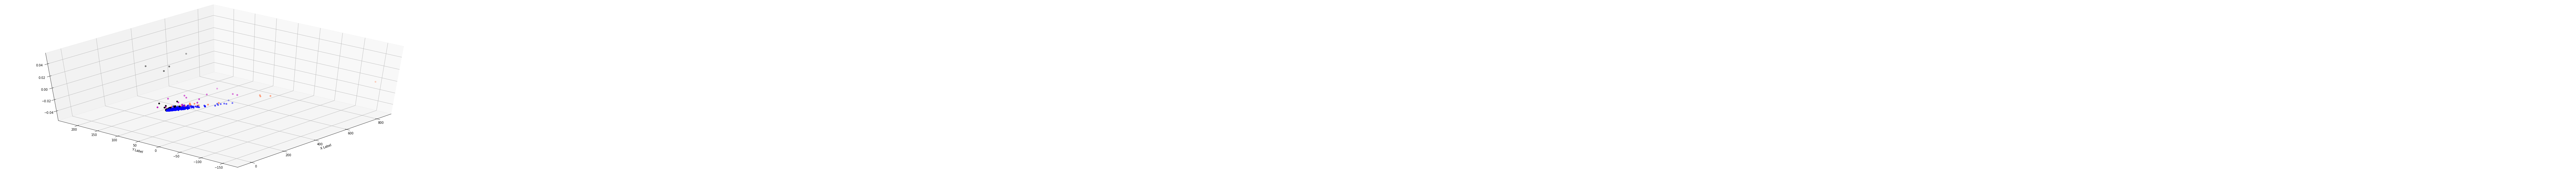

In [47]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.gca(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

ax.view_init(45, random.randint(0,360))
print(random.randint(0,360))
plt.show()

248


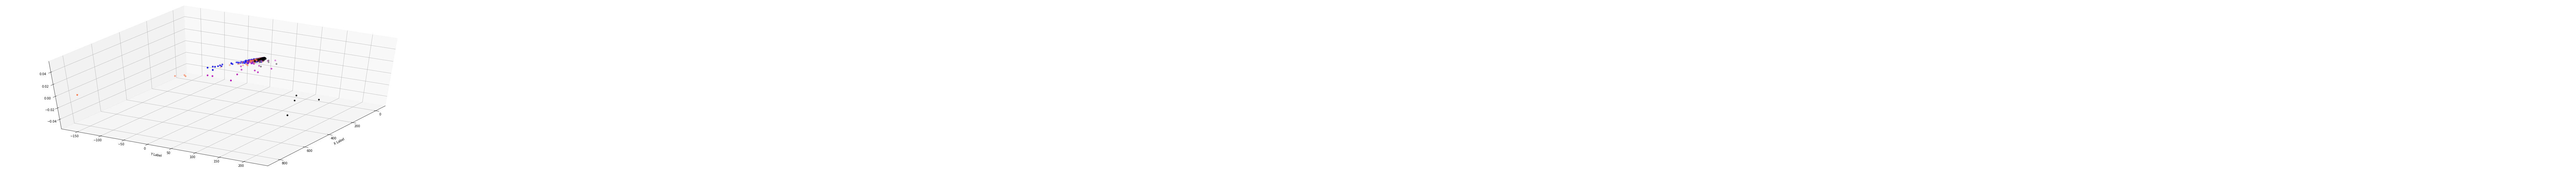

In [48]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.gca(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

ax.view_init(45, random.randint(0,360))
print(random.randint(0,360))
plt.show()

###  >>> Exercise 13(take home): 

In [49]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [196]:
import plotly.plotly as py
import helpers.text_analysis as ta
import plotly
plotly.tools.set_credentials_file(username='michaelwsj', api_key='KmCWJGUAvvS8WZvpWfj2')
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/srv/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




###  >>> Exercise 14(take home): 

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [58]:
term_frequencies = []
for j in range(0,X_sample_counts.shape[1]):
    term_frequencies.append(sum(X_sample_counts[:,j].toarray()))

In [59]:
py.iplot(ta.plot_word_frequency([sample_count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/srv/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




###  >>> Exercise 15(take home): 

In [60]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), sorted(term_frequencies,key=lambda x: -x)], "Term Frequency Distribution"))

/srv/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


/srv/conda/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



###  >>> Exercise 16(take home): 

In [61]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#Success!

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Part 2: New dataset(Lab1 operations)

## Necessary libraries

In [211]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np

## Data preparation

The function "readdata" is used for reading a single file and seperate sentences and scores

In [212]:
def readdata(filename, sentence, score):
    f =  open(filename, 'r')
    for line in open(filename):
        line = f.readline()
        temp = line.rstrip('\n').split('\t')
        sentence.append(temp[0])
        score.append(temp[1])
    return

This function is used to read the three datasets

In [213]:
def loaddata(sentence,score):
    readdata('./sentiment labelled sentences/yelp_labelled.txt',sentence,score)
    readdata('./sentiment labelled sentences/imdb_labelled.txt',sentence,score)
    readdata('./sentiment labelled sentences/amazon_cells_labelled.txt',sentence,score)
    return

In [214]:
sentence = list()
score = list()
loaddata(sentence,score)

## Data Transformation

In [215]:
X = pd.DataFrame({'sentences': sentence})
X

,sentences
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.
6,Honeslty it didn't taste THAT fresh.)
7,The potatoes were like rubber and you could te...
8,The fries were great too.
9,A great touch.


In [216]:
X['score'] = np.asarray(score)
X

,sentences,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


## Query

In [217]:
X[0:10][["sentences", "score"]]

,sentences,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [218]:
X[-10:]

,sentences,score
2990,I'm really disappointed all I have now is a ch...,0
2991,Painful on the ear.,0
2992,Lasted one day and then blew up.,0
2993,disappointed.,0
2994,Kind of flops around.,0
2995,The screen does get smudged easily because it ...,0
2996,What a piece of junk.. I lose more calls on th...,0
2997,Item Does Not Match Picture.,0
2998,The only thing that disappoint me is the infra...,0
2999,"You can not answer calls with the unit, never ...",0


In [219]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,sentences,score
0,Wow... Loved this place.,1
10,Service was very prompt.,1
20,The Burrittos Blah!,0
30,"Also there are combos like a burger, fries, an...",1
40,The shrimp tender and moist.,1
50,We ordered the duck rare and it was pink and t...,1
60,At least think to refill my water before I str...,0
70,"The deal included 5 tastings and 2 drinks, and...",1
80,Coming here is like experiencing an underwhelm...,0
90,"In summary, this was a largely disappointing d...",0


## Checking NULL and duplicates

In [220]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences    (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
dtype: object

In [221]:
sum(X.duplicated())

17

In [222]:
len(X)

3000

In [223]:
X.drop_duplicates(keep=False, inplace=True) 

In [224]:
len(X)

2966

## Sampling

In [225]:
X_sample = X.sample(n=500)
X_sample[0:10]

,sentences,score
1071,Often the dialogue doesn't really follow from ...,0
360,The buffet is small and all the food they offe...,0
2383,After trying many many handsfree gadgets this ...,1
1275,"The performances are real and gripping, the cr...",1
2110,"Sound quality on both end is excellent, I use ...",1
2095,Will order from them again!,1
2949,I had to purchase a different case.,0
2266,Returned 8 hours later.,0
767,The block was amazing.,1
238,If she had not rolled the eyes we may have sta...,0


## Data visualization

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

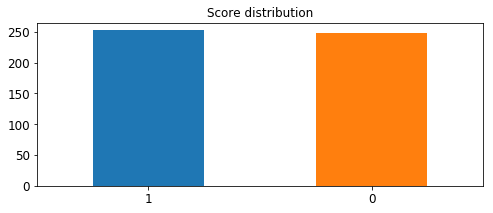

In [227]:
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [228]:
print(X_sample.score.value_counts())

1    252
0    248
Name: score, dtype: int64


## Feature creation

In [229]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [230]:
X['unigrams'] = X['sentences'].apply(lambda x: dmh.tokenize_text(x))
X[0:10]

,sentences,score,unigrams
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,..."
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did, n't, taste, THAT, fresh, ...."
7,The potatoes were like rubber and you could te...,0,"[The, potatoes, were, like, rubber, and, you, ..."
8,The fries were great too.,1,"[The, fries, were, great, too, .]"
9,A great touch.,1,"[A, great, touch, .]"


## Feature subset selection

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentences)

In [232]:
X_counts.shape

(2966, 5153)

In [233]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

## New data visualizations

In [234]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [235]:
from wordcloud import WordCloud

dict1={}
for i in range(0,5153):
    dict1[count_vect.get_feature_names()[i]] = term_frequencies[i]
    


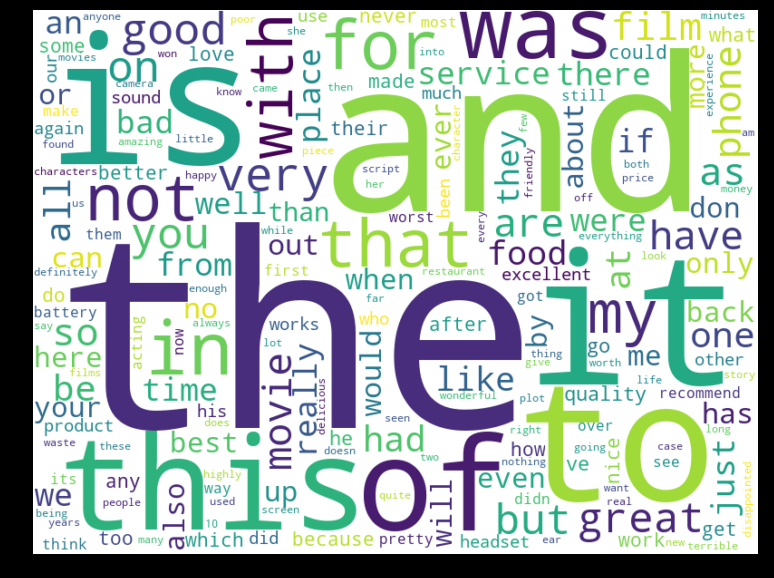

In [236]:
wordcloud = WordCloud(background_color="white", width=800, height=600, margin=2)
wordcloud.generate_from_frequencies(frequencies=dict1)
plt.figure(figsize=(25,10), facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## TFIDF

In [237]:
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(X.sentences)
tfidf_freq = np.asarray(tfidf.sum(axis=0))[0]

In [238]:
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [239]:
tfidf.shape

(2966, 5153)

## Plot Term frequency 

In [240]:
import plotly.plotly as py
import helpers.text_analysis as ta
import plotly
plotly.tools.set_credentials_file(username='michaelwsj', api_key='KmCWJGUAvvS8WZvpWfj2')
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/srv/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




## Calculate Similarity between sentences

In [169]:
from sklearn.metrics.pairwise import cosine_similarity

cossim_freq = cosine_similarity(X_counts, Y=None, dense_output=True)
cossim_freq

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.1767767 , ..., 0.2236068 , 0.13363062,
        0.15075567],
       [0.        , 0.1767767 , 1.        , ..., 0.15811388, 0.18898224,
        0.21320072],
       ...,
       [0.        , 0.2236068 , 0.15811388, ..., 1.        , 0.        ,
        0.13483997],
       [0.        , 0.13363062, 0.18898224, ..., 0.        , 1.        ,
        0.16116459],
       [0.        , 0.15075567, 0.21320072, ..., 0.13483997, 0.16116459,
        1.        ]])

In [170]:
cossim_tfidf = cosine_similarity(X_counts, Y=None, dense_output=True)
cossim_tfidf

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.1767767 , ..., 0.2236068 , 0.13363062,
        0.15075567],
       [0.        , 0.1767767 , 1.        , ..., 0.15811388, 0.18898224,
        0.21320072],
       ...,
       [0.        , 0.2236068 , 0.15811388, ..., 1.        , 0.        ,
        0.13483997],
       [0.        , 0.13363062, 0.18898224, ..., 0.        , 1.        ,
        0.16116459],
       [0.        , 0.15075567, 0.21320072, ..., 0.13483997, 0.16116459,
        1.        ]])

##  Naive Bayes classifier

Term frequency

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [172]:
x_train, x_test, y_train, y_test = train_test_split(count_vect.get_feature_names(),
                                                     term_frequencies,
                                                     test_size=0.25,
                                                     random_state=33)

In [173]:
vec = CountVectorizer()
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)

In [174]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_predict = mnb.predict(x_test)

In [175]:
mnb.score(x_test, y_test)

0.5616757176105508

TFIDF

In [183]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

In [184]:
text_clf.fit(X.sentences, X.score)  
predicted = text_clf.predict(X.sentences)
np.mean(predicted == X.score)     

0.9527983816587997